# OKCupid Dating App

This project analyzes dating app profiles' data from OKCupid, provided by Codecademy.com. The goal of this project is to find out whether it's possible to predict person's age and religious views with sufficient accuracy via machine learning models. 

### Columns Description

Discrete, selectable information:

- **age:** continuous variable of age of user
- **body_type:** categorical variable of body type of user
- **diet:** categorical variable of dietary information
- **drinks:**  categorical variable of alcohol consumption
- **drugs:** categorical variable of drug usage
- **education:** categorical variable of educational attainment
- **ethnicity:** categorical variable of ethnic backgrounds
- **height:** continuous variable of height of user
- **income:** continuous variable of income of user
- **job:** categorical variable of employment description
- **offspring:** categorical variable of children status
- **orientation:** categorical variable of sexual orientation
- **pets:** categorical variable of pet preferences
- **religion:** categorical variable of religious background
- **sex:** categorical variable of gender
- **sign:** categorical variable of astrological symbol
- **smokes:** categorical variable of smoking consumption
- **speaks:** categorical variable of language spoken
- **status:** categorical variable of relationship status
- **last_online:** date variable of last login
- **location:** categorical variable of user locations

Open answer essays:

- **essay0:** My self summary
- **essay1:**  What I’m doing with my life
- **essay2:** I’m really good at
- **essay3:** The first thing people usually notice about me
- **essay4:** Favorite books, movies, show, music, and food
- **essay5:** The six things I could never do without
- **essay6:** I spend a lot of time thinking about
- **essay7:** On a typical Friday night I am
- **essay8:** The most private thing I am willing to admit
- **essay9:** You should message me if…

## Inspecting Data

For starters, let's perform necessary imports and load the `profiles.csv` data into `profiles` variable. 

In [52]:
# Basic imports related to analysis
import numpy as np
import pandas as pd

# Imports for visualisationin
import seaborn as sns
from matplotlib import pyplot as plt

# Imports for ml 
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [2]:
profiles = pd.read_csv('profiles.csv')
pd.set_option('display.max_columns', None)
profiles.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN,white,70.0,80000,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement<br />\nconversation<br />\ncreation<b...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...",NaN,68.0,-1,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . .<br />\nlynch, j...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.,white,71.0,20000,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians<br />\nat the...",NaN,NaN,NaN,NaN,NaN,"asian, black, other",66.0,-1,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [3]:
profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

As one can see there are 59946 rows and 31 columns in this dataset. As columns description tells us, almost all data is categorical, there are only 3 columns with numerical data types. 

Considering we are going to predict age and religion, let's see what information we have in those columns and how many representatives in each variation. 

In [4]:
profiles.religion.unique()

array(['agnosticism and very serious about it',
       'agnosticism but not too serious about it', nan, 'atheism',
       'christianity', 'christianity but not too serious about it',
       'atheism and laughing about it',
       'christianity and very serious about it', 'other', 'catholicism',
       'catholicism but not too serious about it',
       'catholicism and somewhat serious about it',
       'agnosticism and somewhat serious about it',
       'catholicism and laughing about it',
       'agnosticism and laughing about it', 'agnosticism',
       'atheism and somewhat serious about it',
       'buddhism but not too serious about it',
       'other but not too serious about it', 'buddhism',
       'other and laughing about it',
       'judaism but not too serious about it',
       'buddhism and laughing about it',
       'other and somewhat serious about it',
       'other and very serious about it',
       'hinduism but not too serious about it',
       'atheism but not too ser

In religion column there is an additional parameter which tells a person's attitude toward's their religious views. We won't predict this attitude, just the religion itself, so this column requires modification to become labels for of our models. Let's check, roughly how many representatives of each religion we could count at this point.  

In [5]:
profiles.religion.value_counts()

agnosticism                                   2724
other                                         2691
agnosticism but not too serious about it      2636
agnosticism and laughing about it             2496
catholicism but not too serious about it      2318
atheism                                       2175
other and laughing about it                   2119
atheism and laughing about it                 2074
christianity                                  1957
christianity but not too serious about it     1952
other but not too serious about it            1554
judaism but not too serious about it          1517
atheism but not too serious about it          1318
catholicism                                   1064
christianity and somewhat serious about it     927
atheism and somewhat serious about it          848
other and somewhat serious about it            846
catholicism and laughing about it              726
judaism and laughing about it                  681
buddhism but not too serious ab

In [6]:
profiles.religion.describe()

count           39720
unique             45
top       agnosticism
freq             2724
Name: religion, dtype: object

There are not many users who consider themselves as professions of Islam in some form, compared to other religions, that will, most likely, impact some models' predictions. 

Now let's switch to age. 

In [7]:
profiles.age.unique()

array([ 22,  35,  38,  23,  29,  32,  31,  24,  37,  28,  30,  39,  33,
        26,  27,  20,  25,  40,  36,  21,  34,  43,  46,  41,  42,  45,
        18,  55,  50,  59,  44,  48,  54,  51,  62,  52,  19,  58,  66,
        53,  63,  47,  49,  61,  60,  57,  56,  65,  64,  68, 110,  69,
        67, 109], dtype=int64)

In [8]:
profiles.age.value_counts()

26     3724
27     3685
28     3583
25     3531
29     3295
24     3242
30     3149
31     2735
23     2592
32     2587
33     2206
22     1934
34     1902
35     1755
36     1583
37     1427
38     1330
21     1282
39     1172
42     1072
40     1030
41      980
20      953
43      858
44      708
45      643
19      611
46      578
47      529
48      481
49      459
50      437
51      350
52      344
18      309
56      271
54      267
55      265
57      256
53      252
59      221
58      197
60      195
61      176
62      167
63      138
64      113
65      109
66      105
67       66
68       59
69       31
110       1
109       1
Name: age, dtype: int64

In [9]:
profiles.age.describe()

count    59946.000000
mean        32.340290
std          9.452779
min         18.000000
25%         26.000000
50%         30.000000
75%         37.000000
max        110.000000
Name: age, dtype: float64

In [10]:
profiles.age.median()

30.0

`75%` of dating app users are younger than 37. That also arises an issue with equality of representative groups in a dataset. We'll try to mitigate this issue going further in our research. 


## Feature Modelling

### Mapping

Not all our columns will be suitable for predicting age and religion. We'll use as columns with categorical variables as the ones with free text strings, but process them differently. 

We'll map the following categorical variables to numbers: `body_type`, `diet`, `drinks`, `drugs`, `education`, `ethnicity`, `offspring`, `smokes`.  
We we'll apply different approaches to mapping depending on column's variables. For instance, in case of `body_type`, we'll start from `used up` with value `1` to `overweight` with a value `11`.

In [11]:
# Import mapped data 
from mapping_profiles import map_to_numbers, age_to_num, age_to_str
mix_profiles, map_body_t, map_diet, map_drinks, map_smoking, map_kids, map_edu, map_drugs = map_to_numbers(profiles)
mix_profiles['age'] = profiles.age.apply(age_to_num)
mix_profiles.head(2)

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,1.0,9.0,1.0,2.0,0.0,4.0,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california",1.0,straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,1.0,english,single
1,2.0,4.0,6.0,3.0,1.0,2.0,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN,white,70.0,80000,hospitality / travel,2012-06-29-21-41,"oakland, california",1.0,straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,0.0,"english (fluently), spanish (poorly), french (...",single


In [12]:
def map(value):
    data = {}
    for element in value.split(', '):
        data[element] = 1
    return pd.Series(data=data)
ethnicity = profiles.ethnicity.dropna().apply(map).fillna(0)
ethnicity.head(2)

,asian,white,black,other,hispanic / latin,pacific islander,native american,middle eastern,indian
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
mix_profiles = mix_profiles.join(ethnicity)
mix_profiles.head(2)

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status,asian,white,black,other,hispanic / latin,pacific islander,native american,middle eastern,indian
0,1.0,9.0,1.0,2.0,0.0,4.0,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california",1.0,straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,1.0,english,single,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,4.0,6.0,3.0,1.0,2.0,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN,white,70.0,80000,hospitality / travel,2012-06-29-21-41,"oakland, california",1.0,straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,0.0,"english (fluently), spanish (poorly), french (...",single,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
religion = profiles.religion.dropna().apply(lambda value: value.split(' ')[0]).fillna(0)
unique_religions = list(religion.unique())
religion = religion.apply(lambda r: unique_religions.index(r))
religion = pd.DataFrame({'num_religion': religion })

In [15]:
mix_profiles = mix_profiles.join(religion)
mix_profiles.head(2)

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status,asian,white,black,other,hispanic / latin,pacific islander,native american,middle eastern,indian,num_religion
0,1.0,9.0,1.0,2.0,0.0,4.0,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california",1.0,straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,1.0,english,single,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,4.0,6.0,3.0,1.0,2.0,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN,white,70.0,80000,hospitality / travel,2012-06-29-21-41,"oakland, california",1.0,straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,0.0,"english (fluently), spanish (poorly), french (...",single,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
num_profiles = mix_profiles[['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'offspring',
    'smokes', 'num_religion', 'asian', 'white', 'black', 'other', 
    'hispanic / latin', 'pacific islander', 'native american', 'middle eastern', 'indian']]
len(num_profiles)


59946

In [17]:
num_profiles.corr()[:1]

,age,body_type,diet,drinks,drugs,education,offspring,smokes,num_religion,asian,white,black,other,hispanic / latin,pacific islander,native american,middle eastern,indian
age,1.0,0.05842,0.034472,-0.121266,-0.133721,0.113422,0.400974,-0.115239,0.09916,-0.088838,0.102778,-0.031698,-0.026952,-0.077764,-0.039271,-0.023456,-0.035368,-0.031729


In [27]:
age_labels_features = mix_profiles[['age', 'drinks', 'drugs', 'education', 'offspring', 'smokes']]
age_labels_features = age_labels_features.dropna().copy()
len(age_labels_features)

17088

In [28]:
age_labels = age_labels_features[['age']]
age_features = age_labels_features[['drinks', 'drugs', 'education', 'offspring', 'smokes']]
age_features.head(2)

,drinks,drugs,education,offspring,smokes
0,2.0,0.0,4.0,1.0,1.0
1,3.0,1.0,2.0,1.0,0.0


In [29]:
num_profiles.corr()[8:9]

,age,body_type,diet,drinks,drugs,education,offspring,smokes,num_religion,asian,white,black,other,hispanic / latin,pacific islander,native american,middle eastern,indian
num_religion,0.09916,0.03882,0.065258,-0.0724,-0.082393,0.014881,0.15083,-0.03472,1.0,-0.02364,-0.078897,-0.006371,0.037658,0.033506,0.056028,-0.00054,0.04103,0.117721


In [30]:
relig_labels_features = mix_profiles[[
    'age', 'diet', 'drinks', 'drugs', 'offspring',
    'smokes', 'asian', 'white', 'black', 'other', 'num_religion',
    'hispanic / latin', 'pacific islander', 'native american', 'middle eastern', 'indian' 
    ]]
relig_labels_features = relig_labels_features.dropna().copy()
len(relig_labels_features)

10195

In [31]:
relig_labels = relig_labels_features[['num_religion']]
relig_features = relig_labels_features[[
    'age', 'diet', 'drinks', 'drugs', 'offspring',
    'smokes', 'asian', 'white', 'black', 'other',
    'hispanic / latin', 'pacific islander', 'native american', 'middle eastern', 'indian' 
    ]]
relig_features.head(2)

,age,diet,drinks,drugs,offspring,smokes,asian,white,black,other,hispanic / latin,pacific islander,native american,middle eastern,indian
0,1.0,1.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,6.0,3.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
train_data_a, test_data_a, train_labels_a, test_labels_a = train_test_split(age_features, age_labels, random_state=2)
train_data_r, test_data_r, train_labels_r, test_labels_r = train_test_split(relig_features, relig_labels, random_state=6)

In [49]:
# Instantiate classifier
forest_a = RandomForestClassifier(random_state=1)
# Train classifier
forest_a.fit(train_data_a, train_labels_a.values.ravel())
# Get accuracy of the classifier
print(round(forest_a.score(test_data_a, test_labels_a), 4)*100, '%')

55.1 %


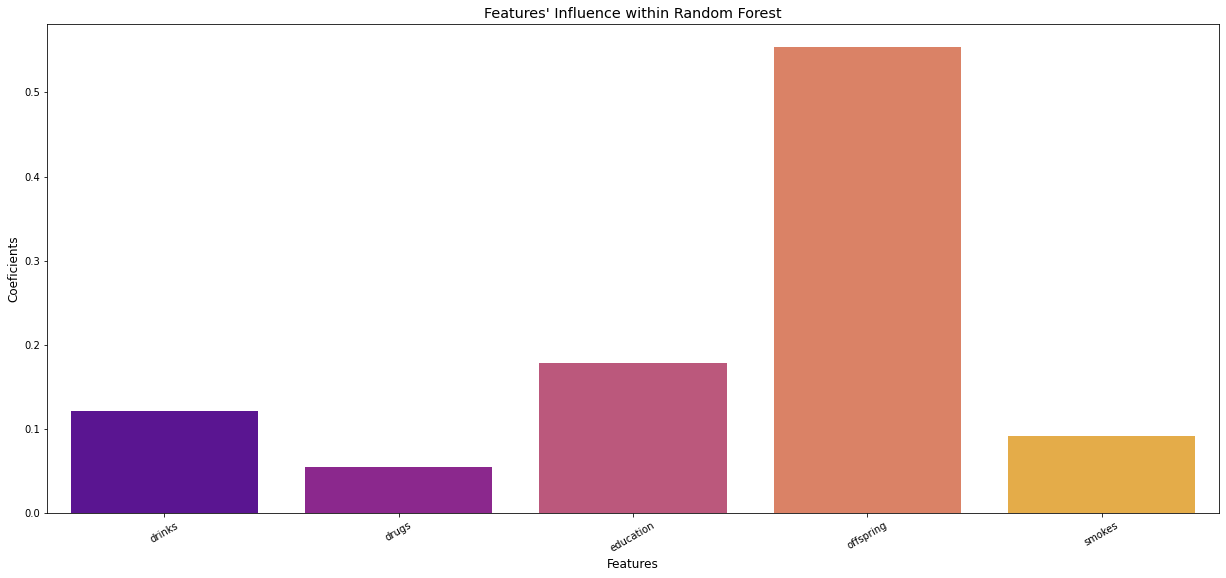

In [54]:
def visualise_barchart(feature_lst, values):
    # Prepare grid
    plt.figure(figsize = (21,9))
    
    # Draw barplot
    ax = sns.barplot(x = feature_lst, y = values, palette='plasma')

    # Add descriptions
    plt.title('Features\' Influence within Random Forest', fontsize='x-large')
    plt.xlabel('Features', fontsize='large')
    plt.ylabel('Coeficients', fontsize='large')
    ax.set_xticklabels(feature_lst, rotation=30)

    return plt.show()

visualise_barchart(
    forest_a.feature_names_in_, 
    forest_a.feature_importances_)

In [53]:
forest_a.feature_importances_

array([0.12209841, 0.05443093, 0.17843403, 0.5533329 , 0.09170373])

In [51]:
# Instantiate classifier
forest_r = RandomForestClassifier(random_state=6)
# Train classifier
forest_r.fit(train_data_r, train_labels_r.values.ravel())
# Get accuracy of the classifier
print(round(forest_r.score(test_data_r, test_labels_r), 4)*100, '%')

27.07 %


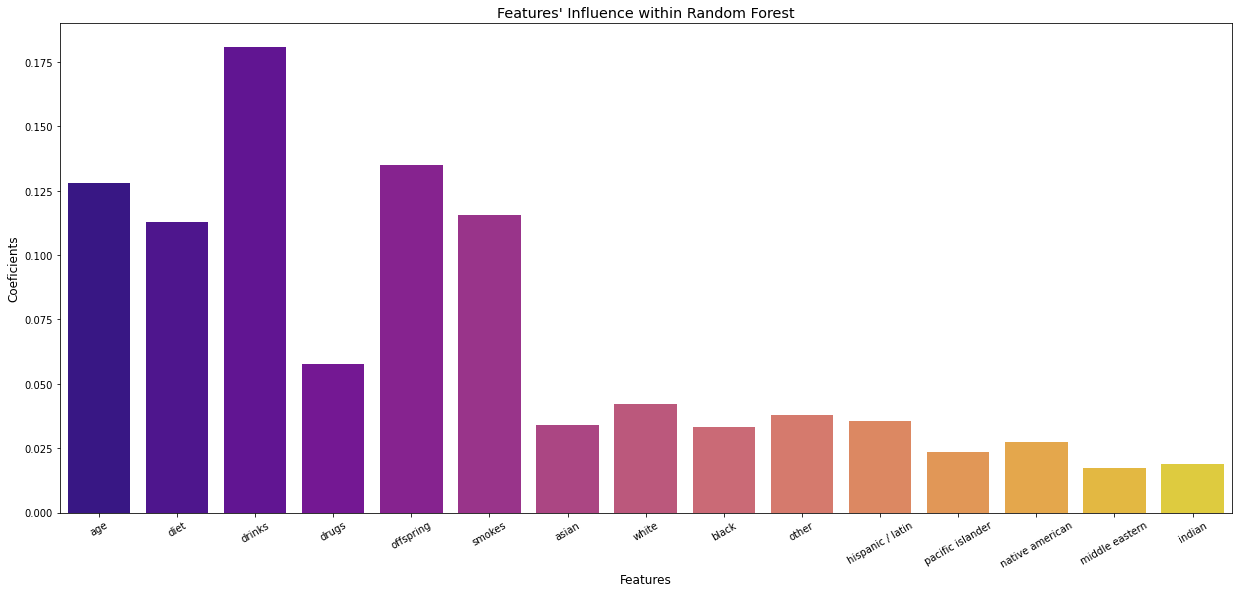

In [55]:
visualise_barchart(
    forest_r.feature_names_in_, 
    forest_r.feature_importances_)